In [20]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from matplotlib import pyplot as plt
from impl import *
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


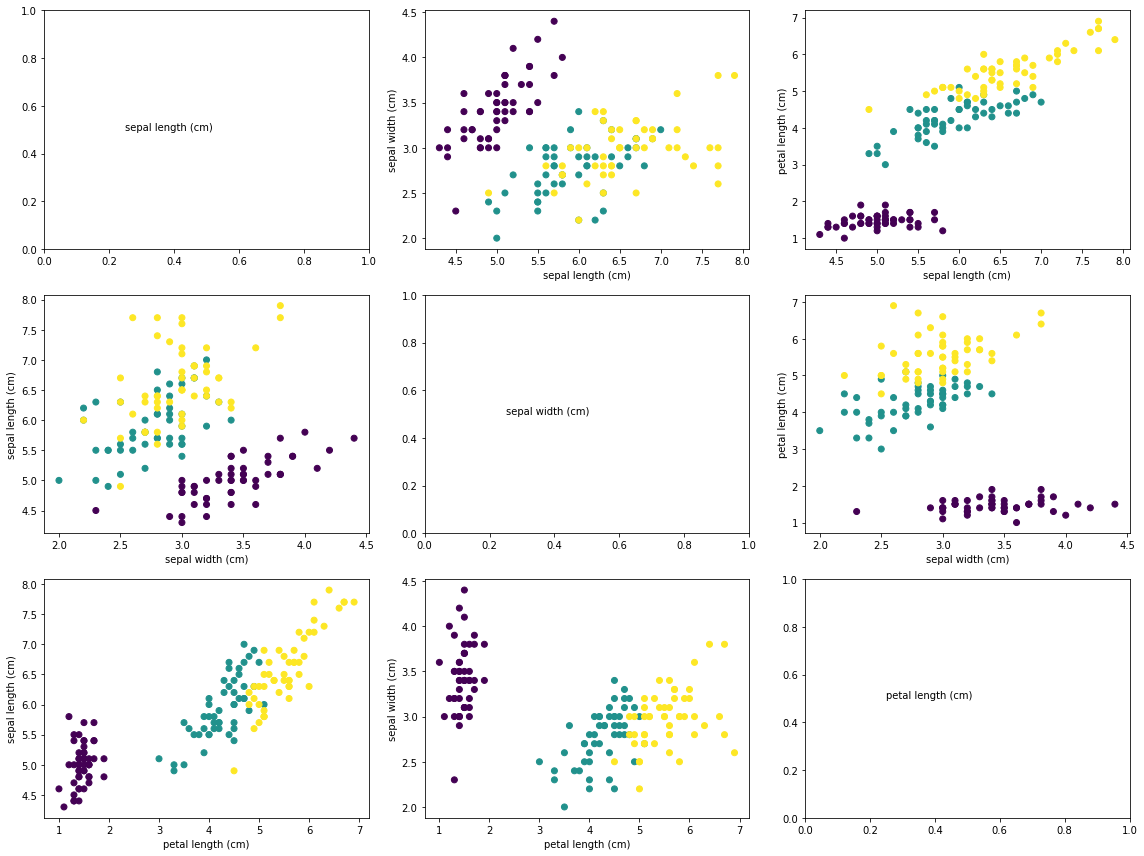

In [21]:
iris_ds = datasets.load_iris()
X = iris_ds.data
Y = iris_ds.target
plot_data(X, Y, iris_ds.feature_names, (16, 12))
plt.tight_layout()

In [22]:
classifier = PotentialFunctionClassifier(0.1)

classifier.fit(X, Y)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.5, random_state=10)

model = PotentialFunctionClassifier(0.5)
model.fit(train_x, train_y, 0.000005)
pred = model.predict(test_x)

print("Accuracy: ", metrics.accuracy_score(test_y, pred))


Accuracy:  0.9466666666666667


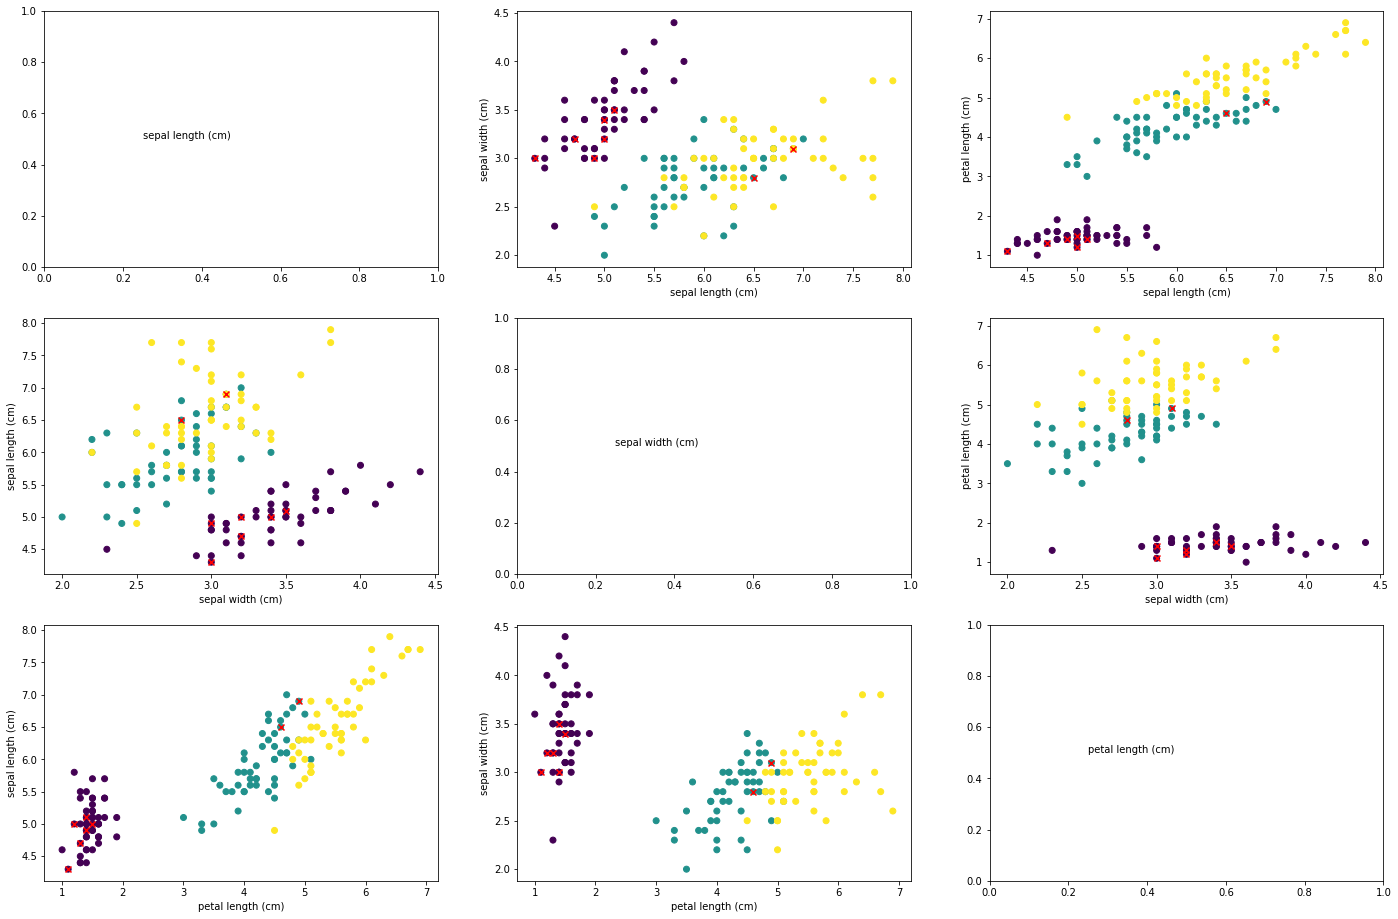

In [27]:
num_features = X.shape[1] - 1

plt.figure(figsize=(24, 16))

for i, (f1, f2) in enumerate(grid(num_features)):
    plt.subplot(num_features, num_features, 1 + i)

    if f1 == f2:
        plt.text(0.25, 0.5, iris_ds.feature_names[f1])
    else:
        plt.scatter(X[:, f1], X[:, f2], c=Y)
        plt.scatter(X[model.indexes, f1], X[model.indexes, f2], c='r', marker='x')
        plt.xlabel(iris_ds.feature_names[f1])
        plt.ylabel(iris_ds.feature_names[f2])